<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">
###  Intro to Probabilistic Programming & Markov Chain Monte Carlo

Week 10 | Lesson 1.1

---
| TIMING  | TYPE  
|:-:|---|---|
| 10 min| [**Industry Example **](#hook) |
| 25 min| [Review](#review) |
| 45 min| [**Content **](#content) |
| 20 min| [Conclusion](#conclusion) |
| 5 min | [Additional Resources](#more)

---

### Lesson Objectives
*After this lesson, you will be able to:*
- Explain what a Markov Chain is 
- Explain what a Monte Carlo Simulation is
- Explain what Markov Chian Monte Carlo is
- Explain how the Metropolis-Hastings sampler works
- Explain what probabilistic programming is 


---
### Student Pre-Work 

*Before this lesson, you should already be able to:*
- Install pymc3 prior to the start of the lesson
- Intsall theano prior to the start of the lesson 



In [28]:
import scipy.stats as stats
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
% matplotlib inline

---
<a name="hook"> </a>

## Applications: 


![](https://cdn-images-1.medium.com/max/800/0*II7wZlKViCt4ssBm.png)

Have you ever wondered how LDA is able to sample from the various distributions included in its algorithm in order to generate topics for a corpus?

That generatative process has **Bayesian statistics** and something called **Markov Chain Monte Carlo** at its core. By using the Bayesian statistical framework, Markov Chain Monte Carlo is able to sample from a long chain of distributions that depend on each other (more on that later) in order to generate a distribution of topic names for a corpus. In LDA there is a distribution for topics, a distribution for words, and a distribution for documents. 

Markov Chain Monte Carlo is a sampling algorithm. 

---
<a name="review"></a>
## Review: 


### Bayes Law

![](https://s-media-cache-ak0.pinimg.com/736x/40/6e/ae/406eae9706dcd3994cd5764cbef8f529.jpg)

In our lessons about statistics, we introduced Bayes Law and Bayesian Statistics as an alternative statistical framework to the frequntist. Unlike the frequntist, **bayesians can model uncertain by using the prior probability** (i.e. what is the probability that the hypothesis is true).By combining the prior with the likihood, they can get an updated probability called the posterior probability.  Where as **frequentist just assume that the hypothesis is true** and ask the question, what is the likelihood of seeing the data given the that hypothesis is true -- they only use the likelihood probability. 



![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Bayes_theorem_drugs_example_tree.svg/440px-Bayes_theorem_drugs_example_tree.svg.png)


We also developed an intuitive understanding of how bayes law works by drawing probability trees. These **probability trees show how probabilities propagate as we consider specific circumstances**. For instance, the diagram first considers two scenarios: probability that $U$ is true and the probability that $U$ is not true -- denoted as $\bar{U}$. Given these starting points, the diagram then shows what the probabilitiy is for a postive or negative outcome given each starting point. 

Don't worry about what $U$ and $\bar{U}$ represent in the above tree. What is important here is to understand the logic of probability trees, understand how probabilities are storted and reasoned about. 

### Check for Understanding
>**SCENARIO :**
>
>One in every 200 people is
infected by a virus. A test is used to determine whether a
person is infected. If a person is infected, the test is positive
80% of the time, and if the person is not infected the test is
still positive 5% of the time
>
>**DIRECTIONS: **
>
>Use Bayes Law to find the probability that a person is not infected given that the test is negative. 
> 
>**HINT: **
>
>Draw a probability tree to help you sort through the possible probabilities. 

### Interpretation | Confidence Interval vs. Credible Interval 


A commonly-used measure of uncertainty for a statistical point estimate in classical statistics is the ***confidence interval***. Most scientists were introduced to the confidence interval during their introductory statistics course(s) in college. Yet, a large number of users mis-interpret the confidence interval.

Here is the mathematical definition of a 95% confidence interval for some unknown scalar quantity that we will here call \\(\theta\\):

$$$$

<div style="font-size:25px">
\\[Pr(a(Y) < \theta < b(Y) | \theta) = 0.95\\]
</div>

$$$$


how the endpoints of this interval are calculated varies according to the sampling distribution of \\(Y\\), but for as an example, the confidence interval for the population mean when \\(Y\\) is normally distributed is calculated by:

$$$$
\\[Pr(\bar{Y} - 1.96\frac{\sigma}{\sqrt{n}}< \theta < \bar{Y} + 1.96\frac{\sigma}{\sqrt{n}}) = 0.95\\]
$$$$

It would be tempting to use this definition to conclude that there is a 95% chance \\(\theta\\) is between \\(a(Y)\\) and \\(b(Y)\\), but that would be a mistake. 

**Frequentists regard unknown parameters are fixed**, which means there is no probability associated with them being any value except what they are fixed to. Here, the interval itself, and not \\(\theta\\) is the random variable. The actual interval calculated from the data is just one possible realization of a random process, and it must be strictly interpreted only in relation to an infinite sequence of identical trials that might be (but never are) conducted in practice.

A valid interpretation of the above would be:

> If the experiment were repeated an infinite number of times, 95% of the calculated intervals would contain \\(\theta\\).

This is what the statistical notion of "confidence" entails, and this sets it apart from probability intervals.

**Bayesians regard unknown parameters as random variables**, Bayesians can and do use probability intervals to describe what is known about the value of an unknown quantity. These intervals are commonly known as ***credible intervals***.

The definition of a 95% credible interval is:


$$$$
<div style="font-size:25px">
\\[Pr(a(y) < \theta < b(y) | Y=y) = 0.95\\]
</div>

$$$$

Notice that we condition here on the data \\(y\\) instead of the unknown \\(\theta\\). Thus, the endpoints are fixed and the variable is random. 

We are allowed to interpret this interval as:

> There is a 95% chance \\(\theta\\) is between \\(a\\) and \\(b\\).

Hence, the credible interval is a statement of what we know about the value of \\(\theta\\) based on the observed data.

### Check for Understanding

>**SCENARIO :**
>
>Draw a box with 4 squares inside of it -- think confusion matrix. One row is for Bayesian statistics and the other row is for Frequentist statistics. One column is for Parameter. The other column is for Data
>
>**DIRECTIONS: **
>
> In each of the 4 squres insdie of the box, write "fixed" or "random" to illustrate how each statistical paradigm thinks about distribution parameters and data. 



### Probability Distribuitons 


**Let's quickly recall what a probability distribution is:** Let $Z$ be some random variable. Then associated with $Z$ is a *probability distribution function* that assigns probabilities to the different outcomes $Z$ can take. Graphically, a probability distribution is a curve where the probability of an outcome is proportional to the height of the curve. You can see examples in the first figure of this chapter. 

We can divide random variables into three classifications:

-   **$Z$ is discrete**: Discrete random variables may only assume values on a specified list. Things like populations, movie ratings, and number of votes are all discrete random variables. Discrete random variables become more clear when we contrast them with...

-   **$Z$ is continuous**: Continuous random variable can take on arbitrarily exact values. For example, temperature, speed, time, color are all modeled as continuous variables because you can progressively make the values more and more precise.

- **$Z$ is mixed**: Mixed random variables assign probabilities to both discrete and continuous random variables, i.e. it is a combination of the above two categories. 



### Discrete Case
If $Z$ is discrete, then its distribution is called a *probability mass function*, which measures the probability $Z$ takes on the value $k$, denoted $P(Z=k)$. Note that the probability mass function completely describes the random variable $Z$, that is, if we know the mass function, we know how $Z$ should behave. There are popular probability mass functions that consistently appear: we will introduce them as needed, but let's introduce the first very useful probability mass function. We say $Z$ is *Poisson*-distributed if:

$$P(Z = k) =\frac{ \lambda^k e^{-\lambda} }{k!}, \; \; k=0,1,2, \dots $$

$\lambda$ is called a parameter of the distribution, and it controls the distribution's shape. For the Poisson distribution, $\lambda$ can be any positive number. By increasing $\lambda$, we add more probability to larger values, and conversely by decreasing $\lambda$ we add more probability to smaller values. One can describe $\lambda$ as the *intensity* of the Poisson distribution. 

Unlike $\lambda$, which can be any positive number, the value $k$ in the above formula must be a non-negative integer, i.e., $k$ must take on values 0,1,2, and so on. This is very important, because if you wanted to model a population you could not make sense of populations with 4.25 or 5.612 members. 

If a random variable $Z$ has a Poisson mass distribution, we denote this by writing

$$Z \sim \text{Poi}(\lambda) $$

One useful property of the Poisson distribution is that its expected value is equal to its parameter, i.e.:

$$E\large[ \;Z\; | \; \lambda \;\large] = \lambda $$

We will use this property often, so it's useful to remember. Below, we plot the probability mass distribution for different $\lambda$ values. The first thing to notice is that by increasing $\lambda$, we add more probability of larger values occurring. Second, notice that although the graph ends at 15, the distributions do not. They assign positive probability to every non-negative integer.

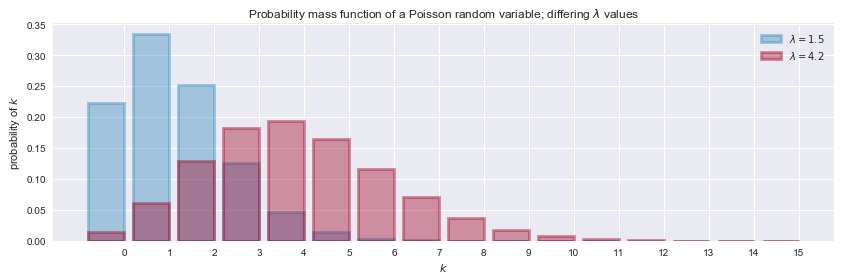

In [17]:
plt.figure(figsize=(14, 4))

a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.40,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.40,
        edgecolor=colours[1], lw="3")


plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values");

### Check for Understanding

>**QUESTIONS :** 
>
> 1. What does the Possion distribuion represent?
>
> 2. What does $\lambda$ mean in the Possion distribuion?
>
>**ANSWER :** 
>
> 1. The Poisson distribution represents the counts of "positive" events, or successes, within a time span.
>
>2.  $\lambda$ is the average rate at which events occur
>
>**HINT :**
>
> Review the week 2 **4.2-random-variables-probability-distributions** notebook

### Continuous Case
Instead of a probability mass function, a continuous random variable has a *probability density function*. This might seem like unnecessary nomenclature, but the density function and the mass function are very different creatures. An example of continuous random variable is a random variable with *exponential density*. The density function for an exponential random variable looks like this:

$$f_Z(z | \lambda) = \lambda e^{-\lambda z }, \;\; z\ge 0$$

Like a Poisson random variable, an exponential random variable can take on only non-negative values. But unlike a Poisson variable, the exponential can take on *any* non-negative values, including non-integral values such as 4.25 or 5.612401. This property makes it a poor choice for count data, which must be an integer, but a great choice for time data, temperature data (measured in Kelvins, of course), or any other precise *and positive* variable. The graph below shows two probability density functions with different $\lambda$ values. 

When a random variable $Z$ has an exponential distribution with parameter $\lambda$, we say *$Z$ is exponential* and write

$$Z \sim \text{Exp}(\lambda)$$

Given a specific $\lambda$, the expected value of an exponential random variable is equal to the inverse of $\lambda$, that is:

$$E[\; Z \;|\; \lambda \;] = \frac{1}{\lambda}$$

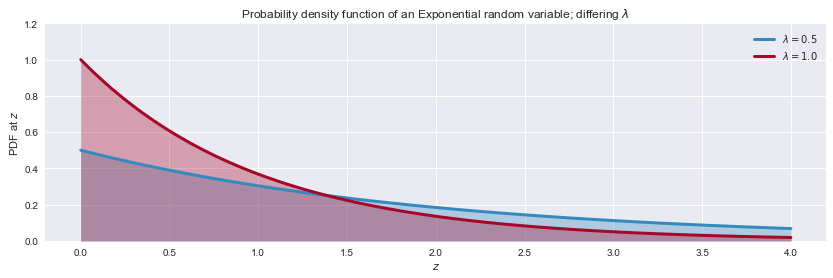

In [18]:
plt.figure(figsize=(14, 4))

a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0,1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

### Check for Understanding

>**QUESTIONS:** 
>
> 1. What does the Exponential distribuion represent?
>
> 2. What does  $\lambda$  and  $z$ mean in the Exponential distribuion?
>
>**Answer :** 
>
> 1. The Exponential Distribution models the amount of time until an event occurs.
>
> 2.  $\lambda$  is the rate of event occurences and $z$ is the time elapsed

---
## **CONTENT**
<a name="content"></a>




### Probabilistic Programming with Bayesian Statistics 

In the real world, $\lambda$ is hidden from us. We see only $Z$, and must go backwards to try and determine $\lambda$. The problem is difficult because there is no one-to-one mapping from $Z$ to $\lambda$. Many different methods have been created to solve the problem of estimating $\lambda$, but since $\lambda$ is never actually observed, no one can say for certain which method is best! 

Bayesian inference is concerned with *beliefs* about what $\lambda$ might be. Rather than try to guess $\lambda$ exactly, we can only talk about what $\lambda$ is likely to be by assigning a probability distribution to $\lambda$.

This might seem odd at first. After all, $\lambda$ is fixed; it is not (necessarily) random! How can we assign probabilities to values of a non-random variable? Ah, we have fallen for our old, frequentist way of thinking. Recall that under Bayesian philosophy, we *can* assign probabilities if we interpret them as beliefs. And it is entirely acceptable to have *beliefs* about the parameter $\lambda$. 

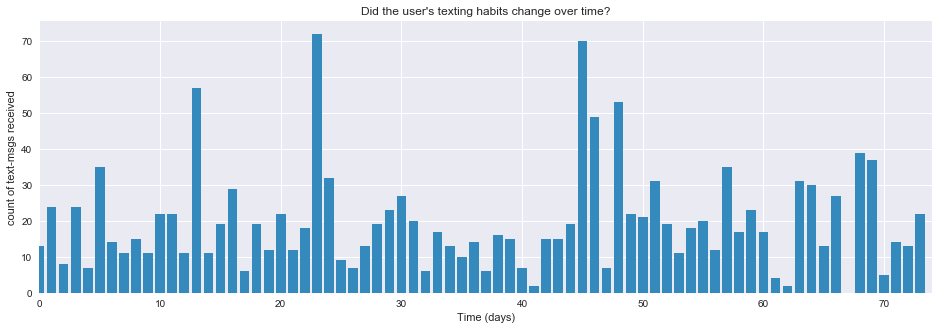

In [27]:
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.figure(figsize = (16,5))
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

Before we start modeling, see what you can figure out just by looking at the chart above. Would you say there was a change in behaviour during this time period? 

How can we start to model this? Well, as we have conveniently already seen, a Poisson random variable is a very appropriate model for this type of *count* data. Denoting day $i$'s text-message count by $C_i$, 

$$ C_i \sim \text{Poisson}(\lambda)  $$

We are not sure what the value of the $\lambda$ parameter really is, however. Looking at the chart above, it appears that the rate might become higher late in the observation period, which is equivalent to saying that $\lambda$ increases at some point during the observations. (Recall that a higher value of $\lambda$ assigns more probability to larger outcomes. That is, there is a higher probability of many text messages having been sent on a given day.)

How can we represent this observation mathematically? Let's assume that on some day during the observation period (call it $\tau$), the parameter $\lambda$ suddenly jumps to a higher value. So we really have two $\lambda$ parameters: one for the period before $\tau$, and one for the rest of the observation period. In the literature, a sudden transition like this would be called a **switchpoint**:

$$
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$


If, in reality, no sudden change occurred and indeed $\lambda_1 = \lambda_2$, then the $\lambda$s posterior distributions should look about equal. More on this later. 

We are interested in inferring the unknown $\lambda$s. To use Bayesian inference, we need to assign prior probabilities to the different possible values of $\lambda$. What would be good prior probability distributions for $\lambda_1$ and $\lambda_2$? Recall that $\lambda$ can be any positive number. As we saw earlier, the *exponential* distribution provides a continuous density function for positive numbers, so it might be a good choice for modeling $\lambda_i$. But recall that the exponential distribution takes a parameter of its own, so we'll need to include that parameter in our model. Let's call that parameter $\alpha$.

\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}

$\alpha$ is called a **hyper-parameter** or **parent variable**. In literal terms, it is a parameter that influences other parameters. Our initial guess at $\alpha$ does not influence the model too strongly, so we have some flexibility in our choice.  A good rule of thumb is to set the exponential parameter equal to the inverse of the average of the count data. Since we're modeling $\lambda$ using an exponential distribution, we can use the expected value identity shown earlier to get:

$$\frac{1}{N}\sum_{i=0}^N \;C_i \approx E[\; \lambda \; |\; \alpha ] = \frac{1}{\alpha}$$ 

An alternative, and something I encourage the reader to try, would be to have two priors: one for each $\lambda_i$. Creating two exponential distributions with different $\alpha$ values reflects our prior belief that the rate changed at some point during the observations.

What about $\tau$? Because of the noisiness of the data, it's difficult to pick out a priori when $\tau$ might have occurred. Instead, we can assign a **uniform prior belief** to every possible day. This is equivalent to saying

\begin{align}
& \tau \sim \text{DiscreteUniform(1,70) }\\\\
& \Rightarrow P( \tau = k ) = \frac{1}{70}
\end{align}


Below we give a graphical visualization of the parameter relationships, where arrows denote `parent-child` relationships. (provided by the [Daft Python library](http://daft-pgm.org/))

<img src="http://i.imgur.com/7J30oCG.png" width = 700/>






We next turn to PyMC3, a Python library for performing Bayesian analysis that is undaunted by the mathematical monster we have created. 

### Check for Understanding

>**QUESTIONS :** 
>
> 1. In your own words, explain how the Bayesian philosophy (i.e. data and parameters) fits into this problem. 
>
> 2. In your own words, explain how the above diagram works. Notice that there are one-directional arrows indicating which parent parameter (and corresponding distribution) affects which child parameter (and corresponding distribution).
>
>**Answer :** 
>
> 1. Bayesian treach data as fixed and distribution parameters as random values. The problem takes advantage of the fact that parameters are treated as random values. This is done assigning each of Possion distribution parameters a parant distribution which can be randomly sampled in order to pull random values for the lambdas. 
>
> 2. The above diagram shows that the fixed data (ie. observations) have been generated from a Possion distribution with parameter lambda. Because we don't know the the value of lambda, we are assigning Exponential distributions to lambda one and lamda two. These Exponential distributions can be sampled from in order to randomly generate values for lambda. The Exponential distributions in turn have a parameter alpha whos value we don't know. Alpha's value is set to be the inverse of the count of text messages. Tau is a randomly sampled value from a Discrete distribution that ranges from the min to the max of the observed data set. So no parent parameter is needed. 

### PyMC3
[**PyMC3**](https://pymc-devs.github.io/pymc3/index.html) is a Python library for programming Bayesian analysis.

We will model the problem above using PyMC3. This type of programming is called **probabilistic programming**, an unfortunate misnomer that invokes ideas of randomly-generated code and has likely confused and frightened users away from this field. The code is not random; it is probabilistic in the sense that we create probability models using programming variables as the model's components. Model components are first-class primitives within the PyMC3 framework. 

Because of the confusion engendered by the term *probabilistic programming*, I'll refrain from using it. Instead, I'll simply say *programming*, since that's what it really is. 

PyMC3 code is easy to read. The only novel thing should be the syntax. Simply remember that we are representing the model's components ($\tau, \lambda_1, \lambda_2$ ) as variables.

### Theano | Side Note


>The majority of the heavy lifting done by PyMC3 is taken care of with the [**theano**](http://deeplearning.net/software/theano/) package. 

>The notation in `theano` is remarkably similar to NumPy. It also supports many of the familiar computational elements of NumPy. However, while NumPy directly executes computations, e.g. when you run `a + b`, `theano` instead builds up a **"computation graph"** that tracks that you want to perform the `+` operation on the elements `a` and `b`. 

>Only when you `eval()` a `theano` expression does the computation take place (i.e. `theano` is lazy evaluated -- similar to Spark). Once the compute graph is built, we can perform all kinds of mathematical optimizations (e.g. simplifications):
    Compute gradients via autodiff
    Compile the entire graph to C to run at machine speed
    Compile it to run on the GPU. 
    
>PyMC3 is basically a collection of `theano` symbolic expressions for various probability distributions that are combined to one big compute graph making up the whole model log probability, and a collection of inference algorithms that use that graph to compute probabilities and gradients. 

For practical purposes, what this means is that in order to build certain models we sometimes have to use `theano`.

Let's write some PyMC3 code that involves `theano` calculations under the hood. 

In [29]:
with pm.Model() as model:
    
    # Recall count_data is the variable that holds our txt counts
    alpha = 1.0/count_data.mean() 
    
    # assign the exponential distribution to lambda one
    lambda_1 = pm.Exponential("lambda_1", alpha)
    
    # assign the exponential distribution to lambda two
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    # assign the discrete uniform distribution to tau
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data)

In the code above, we create the PyMC3 variables corresponding to $\lambda_1$ and $\lambda_2$. We assign them to PyMC3's *stochastic variables*, so-called because they are treated by the back end as random number generators.

In [30]:
with model:
    # Index 
    idx = np.arange(n_count_data) 
    # lambda is a child parameter to the partent parameters lambda_one and lambda_two
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)

This code creates a new function `lambda_`, but really we can think of it as a random variable: the random variable $\lambda$ from above. The `switch()` function assigns `lambda_1` or `lambda_2` as the value of `lambda_`, depending on what side of `tau` we are on. The values of `lambda_` up until `tau` are `lambda_1` and the values afterwards are `lambda_2`.

Note that because `lambda_1`, `lambda_2` and `tau` are random, `lambda_` will be random. We are **not** fixing any variables yet.

In [31]:
with model:
    # observations are given by a Poisson distribution, which is characterized by its single parameter lambda 
    observation = pm.Poisson("obs", lambda_, observed=count_data)

The variable `observation` combines our data, `count_data`, with our proposed data-generation scheme, given by the variable `lambda_`, through the `observed` keyword. 

The code below will be explained in the next section, but I show it here so you can see where our results come from. One can think of it as a **learning** step. The machinery being employed is called **Markov Chain Monte Carlo** (MCMC). This technique returns thousands of random variables from the posterior distributions of $\lambda_1, \lambda_2$ and $\tau$. We can plot a histogram of the random variables to see what the posterior distributions look like. Below, we collect the samples (called *traces* in the MCMC literature) into histograms.

In [32]:
# MCMC Magic!
# Mysterious code to be explained in the next section 
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

/Users/Alexander/anaconda3/envs/dsi/lib/python2.7/site-packages/pymc3/sampling.py:168: UserWarning: Instantiated step methods cannot be automatically initialized. init argument ignored.
  warnings.warn('Instantiated step methods cannot be automatically initialized. init argument ignored.')
100%|██████████| 10000/10000 [00:03<00:00, 3274.54it/s]


In [33]:
# Mysterious code to be explained in the next section
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

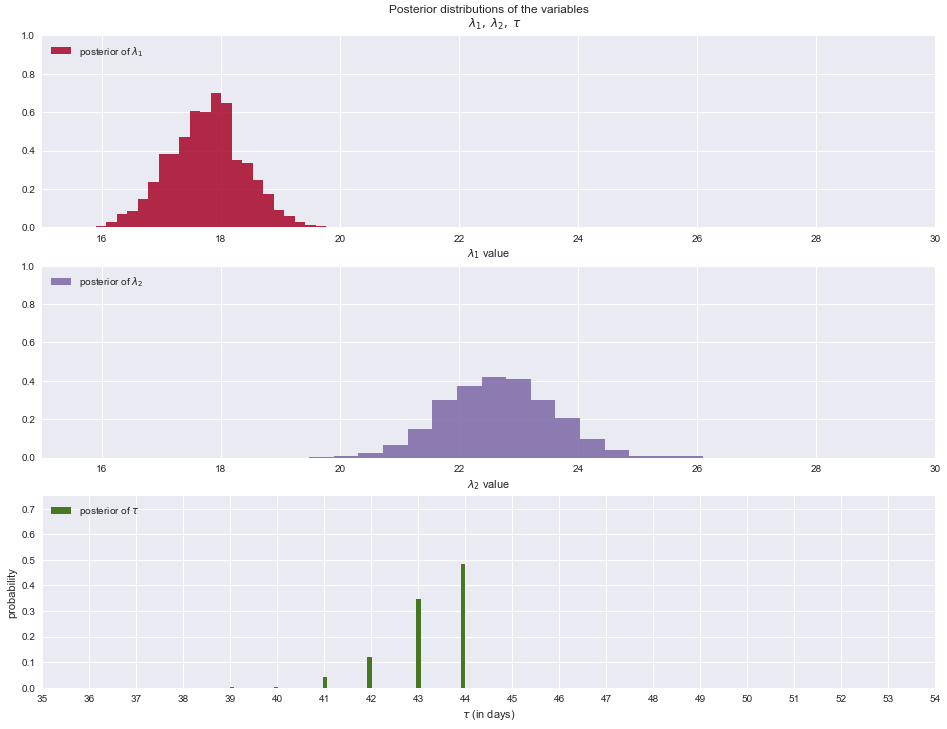

In [37]:
plt.figure(figsize = (16,12))

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

### Interpretation

Recall that Bayesian methodology returns a *distribution*. Hence we now have distributions to describe the unknown $\lambda$s and $\tau$. What have we gained? Immediately, we can see the uncertainty in our estimates: the wider the distribution, the less certain our posterior belief should be. We can also see what the plausible values for the parameters are: $\lambda_1$ is around 18 and $\lambda_2$ is around 23. The posterior distributions of the two $\lambda$s are clearly distinct, indicating that it is indeed likely that there was a change in the user's text-message behaviour.

What other observations can you make? If you look at the original data again, do these results seem reasonable? 

Notice also that the posterior distributions for the $\lambda$s do not look like exponential distributions, even though our priors for these variables were exponential. In fact, the posterior distributions are not really of any form that we recognize from the original model. But that's OK! This is one of the benefits of taking a computational point of view. If we had instead done this analysis using mathematical approaches, we would have been stuck with an analytically intractable (and messy) distribution. Our use of a computational approach makes us indifferent to mathematical tractability.

Our analysis also returned a distribution for $\tau$. Its posterior distribution looks a little different from the other two because it is a discrete random variable, so it doesn't assign probabilities to intervals. We can see that near day 45, there was a 50% chance that the user's behaviour changed. Had no change occurred, or had the change been gradual over time, the posterior distribution of $\tau$ would have been more spread out, reflecting that many days were plausible candidates for $\tau$. By contrast, in the actual results we see that only three or four days make any sense as potential transition points. 

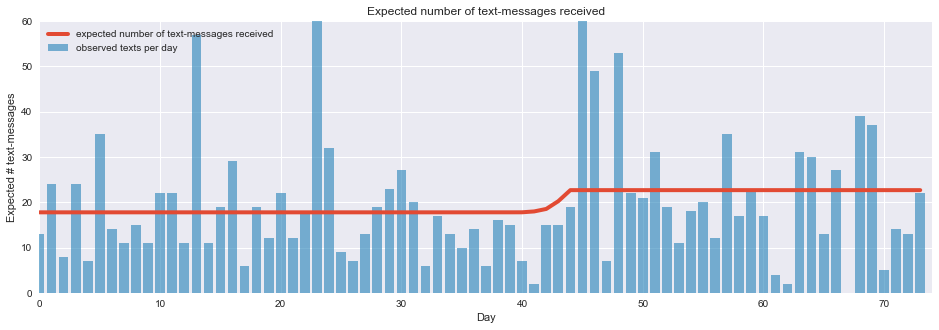

In [42]:
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N

plt.figure(figsize = (16,5))
plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");

### Check for Understanding

>**QUESTIONS :** 
>
> In your own words, explain what the results of ($\lambda_{1}$,$\lambda_{2}$, $\tau$) mean in relation to the problem that we just solved above. 



>**Answer :** 
>
> $\tau$ is the point at which the text messaging habits changed. $\lambda_{1}$ is the parameter for the Possion distribution which characterizes the text messaging rate before the change. $\lambda_{2}$ is the parameter for the Possion distribution which characterizes the text messaging rate after the change. 


You're probably curious about what the follow block of code means:

```python
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)
```

This is MCMC being called and implemented in PyMC3. **Metropolis** is the name of the sampling algorithm that chooses how to sample the parent distributions. 

Now that we have had an introduction to programming with Bayesian Anlysis, we can move on to the next topic: Markov Chain Monte Carlo.


---

## Markov Chain Monte Carlo | Piece by Piece 

Before we move on to Markov Chain Monte Carlo (MCMC), we first need to break down MCMC into its two constituate parts: Markov Models and Monte Carlo Simulations. Once we understand how these methods work independently we can then learn how they are combinded to form MCMC. 



### Markov Chain Model 

![](https://simulatingcomplexity.files.wordpress.com/2015/02/markov-chain.png?w=451&h=222)

Markov models are probability models that will change from one state to another based on two peices of information: 

1. What state is it currently in
2. What is the probability that, given its current state, it will stay in the current state or change to a different state. 

Notice in the image, that state $B$ as two green arrows representing the two possible state changes that it can undergo. Each state change has a probability assinged to it: the sum of those probabilities is one. 

Markov models are "memoryless" in that they do not take into consideration pass states in order to determine future states. 


**Check out this link for a D3 visualization of how these models work:  **[**Markov Chains**](http://setosa.io/ev/markov-chains/)


### Check for Understanding

>**QUESTION:** 
>
> In your own words, explain how Markov Chains work. 


---

### Monte Carlo Simulations


![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Pi_30K.gif/220px-Pi_30K.gif)

**IMAGE:** A monte carlo simulation is being used to approximate the value of $\pi$. 


Monte Carlo simulaitons (MCS) essentially use randomness to solve problems that might be deterministic in principle. However the problems might be very difficult or impossible to solve in practice. MCS are often used in a wide range of fields:

    Physical sciences
    Engineering
    Climate change and radiative forcing
    Computational biology
    Computer graphics
    Applied statistics
    Artificial intelligence for games
    Design and visuals
    Search and rescue
    Finance and business
    -- Wikipedia


The basic algorithm for runing a MCS is as follows:

1. Define a domain of possible inputs 
2. Generate random samples from a probability distribution over the domain.
3. Perform a deterministic computation on the input (i.e. input those random samples into a formula)
4. Aggregate the results (i.e. use another formula)




**Check out this link for a visuallized simulaiton of how this method works: **[**Monte Carlo Simulaiton**](http://www.davidrobles.net/blog/2014/06/22/estimating-pi-using-monte-carlo-simulations/)


### Check for Understanding

>**QUESTION:** 
>
> In your own words, explain how Monte Carlo Simulations work. 



----

## Markov Chain Monte Carlo (MCMC)


### Markov Chains | Mathematical Formulation 

A Markov chain is a special type of *stochastic process*. The standard definition of a stochastic process is an ordered collection of random variables:

$$\begin{gathered}
\begin{split}\{X_t:t \in T\}\end{split}\notag\\\begin{split}\end{split}\notag
\end{gathered}$$

where $t$ is frequently (but not necessarily) a time index. If we think of $X_t$ as a state $X$ at time $t$, and invoke the following dependence condition on each state:

\\[\begin{aligned}
&Pr(X_{t+1}=x_{t+1} | X_t=x_t, X_{t-1}=x_{t-1},\ldots,X_0=x_0) \cr
&= Pr(X_{t+1}=x_{t+1} | X_t=x_t)
\end{aligned}\\]

then the stochastic process is known as a Markov chain. This conditioning specifies that the future depends on the current state, but not past states. Thus, the Markov chain wanders about the state space,
remembering only where it has just been in the last time step. 

The collection of transition probabilities is sometimes called a *transition matrix* when dealing with discrete states, or more generally, a *transition kernel*.

It is useful to think of the Markovian property as **mild dependence**. 

If we use Monte Carlo simulation to generate a Markov chain, this is called **Markov chain Monte Carlo**, or MCMC. If the resulting Markov chain obeys some important properties, then it allows us to indirectly generate independent samples from a particular posterior distribution.


> ### Why MCMC Works: Reversible Markov Chains
> 
> Markov chain Monte Carlo simulates a Markov chain for which some function of interest
> (*e.g.* the joint distribution of the parameters of some model) is the unique, [invariant limiting distribution](http://www.math.uah.edu/stat/markov/Limiting.html). An invariant distribution with respect to some Markov chain with transition kernel $Pr(y \mid x)$ implies that:
> 
> $$\int_x Pr(y \mid x) \pi(x) dx = \pi(y).$$
> 
> Invariance is guaranteed for any *reversible* Markov chain. Consider a Markov chain in reverse sequence:
> $\{\theta^{(n)},\theta^{(n-1)},...,\theta^{(0)}\}$. This sequence is still Markovian, because:
> 
> $$Pr(\theta^{(k)}=y \mid \theta^{(k+1)}=x,\theta^{(k+2)}=x_1,\ldots ) = Pr(\theta^{(k)}=y \mid \theta^{(k+1)}=x)$$
> 
> Forward and reverse transition probabilities may be related through Bayes theorem:
> 
> $$\frac{Pr(\theta^{(k+1)}=x \mid \theta^{(k)}=y) \pi^{(k)}(y)}{\pi^{(k+1)}(x)}$$
> 
> Though not homogeneous in general, $\pi$ becomes homogeneous if:
> 
> -   $n \rightarrow \infty$
> 
> -   $\pi^{(i)}=\pi$ for some $i < k$
> 
> If this chain is homogeneous it is called reversible, because it satisfies the ***detailed balance equation***:
> 
> $$\pi(x)Pr(y \mid x) = \pi(y) Pr(x \mid y)$$
> 
> Reversibility is important because it has the effect of balancing movement through the entire state space. When a Markov chain is reversible, $\pi$ is the unique, invariant, stationary distribution of that chain. Hence, if $\pi$ is of interest, we need only find the reversible Markov chain for which $\pi$ is the limiting distribution.
> This is what MCMC does!




## How MCMC samples | The Metropolis-Hastings Algorithm


The Metropolis-Hastings algorithm generates ***candidate***  state transitions from an alternate distribution, and *accepts* or *rejects* each candidate probabilistically.

Let us first consider a simple Metropolis-Hastings algorithm for a single parameter, $\theta$. We will use a standard sampling distribution, referred to as the *proposal distribution*, to produce candidate variables $q_t(\theta^{\prime} | \theta)$. That is, the generated value, $\theta^{\prime}$, is a *possible* next value for
$\theta$ at step $t+1$. We also need to be able to calculate the probability of moving back to the original value from the candidate, or
$q_t(\theta | \theta^{\prime})$. These probabilistic ingredients are used to define an *acceptance ratio*:

$$\begin{gathered}
\begin{split}a(\theta^{\prime},\theta) = \frac{q_t(\theta^{\prime} | \theta) \pi(\theta^{\prime})}{q_t(\theta | \theta^{\prime}) \pi(\theta)}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

The value of $\theta^{(t+1)}$ is then determined by:

$$\theta^{(t+1)} = \left\{\begin{array}{l@{\quad \mbox{with prob.} \quad}l}\theta^{\prime} & \text{with probability } \min(a(\theta^{\prime},\theta^{(t)}),1) \\ \theta^{(t)} & \text{with probability } 1 - \min(a(\theta^{\prime},\theta^{(t)}),1) \end{array}\right.$$

This transition kernel implies that movement is not guaranteed at every step. It only occurs if the suggested transition is likely based on the acceptance ratio.

A single iteration of the Metropolis-Hastings algorithm proceeds as follows:

1.  Sample $\theta^{\prime}$ from $q(\theta^{\prime} | \theta^{(t)})$.

2.  Generate a Uniform[0,1] random variate $u$.

3.  If $a(\theta^{\prime},\theta) > u$ then
    $\theta^{(t+1)} = \theta^{\prime}$, otherwise
    $\theta^{(t+1)} = \theta^{(t)}$.

The original form of the algorithm specified by Metropolis required that
$q_t(\theta^{\prime} | \theta) = q_t(\theta | \theta^{\prime})$, which reduces $a(\theta^{\prime},\theta)$ to
$\pi(\theta^{\prime})/\pi(\theta)$, but this is not necessary. In either case, the state moves to high-density points in the distribution with high probability, and to low-density points with low probability. After convergence, the Metropolis-Hastings algorithm describes the full target posterior density, so all points are recurrent.

### Random-walk Metropolis-Hastings

A practical implementation of the Metropolis-Hastings algorithm makes use of a random-walk proposal.
Recall that a random walk is a Markov chain that evolves according to:

$$
\theta^{(t+1)} = \theta^{(t)} + \epsilon_t \\
\epsilon_t \sim f(\phi)
$$

As applied to the MCMC sampling, the random walk is used as a proposal distribution, whereby dependent proposals are generated according to:

$$\begin{gathered}
\begin{split}q(\theta^{\prime} | \theta^{(t)}) = f(\theta^{\prime} - \theta^{(t)}) = \theta^{(t)} + \epsilon_t\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

Generally, the density generating $\epsilon_t$ is symmetric about zero,
resulting in a symmetric chain. Chain symmetry implies that
$q(\theta^{\prime} | \theta^{(t)}) = q(\theta^{(t)} | \theta^{\prime})$,
which reduces the Metropolis-Hastings acceptance ratio to:

$$\begin{gathered}
\begin{split}a(\theta^{\prime},\theta) = \frac{\pi(\theta^{\prime})}{\pi(\theta)}\end{split}\notag\\\begin{split}\end{split}\notag\end{gathered}$$

The choice of the random walk distribution for $\epsilon_t$ is frequently a normal or Student’s $t$ density, but it may be any distribution that generates an irreducible proposal chain.

An important consideration is the specification of the **scale parameter** for the random walk error distribution. Large values produce random walk steps that are highly exploratory, but tend to produce proposal values in the tails of the target distribution, potentially resulting in very small acceptance rates. Conversely, small values tend to be accepted more frequently, since they tend to produce proposals close to the current parameter value, but may result in chains that ***mix*** very slowly.

Some simulation studies suggest optimal acceptance rates in the range of 20-50%. It is often worthwhile to optimize the proposal variance by iteratively adjusting its value, according to observed acceptance rates early in the MCMC simulation .


**Check out this link to get an intuitive understanding of how this algorithm works: **[**Metropolis-Hastings**](http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/)


### Check for Understanding

>**QUESTION:** 
>
> In your own words, explain what plots in the **Visualizing MCMC** section of the link are communicating. 
>
>**ANSWER:**
>
> The **first column** is our prior distribution, it is the probability that our current $\mu$ has the value that it has before our model sees the data. The blue vertical line superimposed on the normal distribtuion is the current value of $\mu$. The blue and red vertical lines corresponds to the proposed value of $\mu$, accepting or rejecting it respectively. 
>
> The **second column** is our likihood and it shows how well our model (with the proposed $\mu$) is able to describe our data (which are fixed values and are represented by the histogram). The blue and red lines correspond to the proposed $\mu$ and the blue and red normal curves correspond to the proposed linkihoods, acceted and rejected respectively. 
>
> The **third column** is our posterior distributions. The blue lines represent the current value of $\mu$. The blue and red lines correspond to the proposed $\mu$ values, accpeted and rejected respectively. The ultimate goal of using the MCMC sampler is to get a distribution of $\mu$ values. This distribution will be normal and the mean of this distribution will have the largest probability of being the actual $\mu$ value of the observed data (which is fixed). The blue normal curve is the true analytical curve, which is included in this exercise for learning purposes. But in reality, we wouldn't have access to this true analytical curve, which is why we are using the MCMC sampler. The true curve is included here to show you how the sampled $\mu$ values will "jump" around. This happends because those values are randomly sampled. 
>
> The **forth column** is the trace. This plot shows the history of the proposed $\mu$ values. 




---
## Conclusion
<a name="conclusion"></a>

In this lesson you learned how to: 
- Explain what a Markov Chain is 
- Explain what a Monte Carlo Simulation is
- Explain what Markov Chian Monte Carlo is
- Explain how the Metropolis-Hastings sampler works
- Explain what probabilistic programming is 

---
<a name="more"></a>
## Additional Resources

[**The Monty Hall Problem With Python**](https://medium.com/@NickDoesData/applying-bayes-theorem-simulating-the-monty-hall-problem-with-python-5054976d1fb5) A short Medium article that explains how Bayes Law can be used to solve a famous and unintuitive probability problem. 


[**MCMC: Jupyter Notebook Tutorial**](https://people.duke.edu/~ccc14/sta-663/MCMC.html) A python notebook that explores the same content that was covered in this notebook, but with a different style.

[**Understanding Metropolis-Hasting **](http://nonconditional.com/2013/10/understanding-the-metropolis-hasting-a-tutorial/) A short article explaining to how MCMC and the Metropolis alorithms work.

[**Edward**](http://edwardlib.org/) is probabilistic programming package that uses Tensorflow under the hood in lieu of Theano.

[**MCMC**](http://dept.stat.lsa.umich.edu/~kshedden/Courses/Stat606/Notes/mcmc.pdf) A formal and rigorous exposure to the mathematics of MCMC.


A generous portion of this notebook's main content was heavily borrowed from the following two Github repos. All credit for borrowed materials goes to the respecive authors. 


[**Probabilistic Programming and Bayesian Methods for Hacker**](https://github.com/CamDavidsonPilon/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers)

[**Scipy2014 Tutorial**](https://github.com/fonnesbeck/scipy2014_tutorial)